# Support Vector Machine
## Research Question: "Predict whether a stop and search will conclude in police action".

#### In this notebook we attempt to answer the research question using the data set (https://www.kaggle.com/sohier/london-police-records?select=london-stop-and-search.csv). Specifically, we will attempt to answer it by using K-nearest Neighbor to classify the data points on the target ("Outcome" of the stop and search).

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import util
import numpy as np
import matplotlib.pyplot as plt

## Cleaning the Data set

In [2]:
data = pd.read_csv("data.csv", low_memory = False)

# data = data.dropna()
data = util.data_cleaner(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165651 entries, 0 to 302621
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   Type                       165651 non-null  object             
 1   Date                       165651 non-null  datetime64[ns, UTC]
 2   Latitude                   165651 non-null  float64            
 3   Longitude                  165651 non-null  float64            
 4   Gender                     165651 non-null  object             
 5   Age range                  165651 non-null  object             
 6   Officer-defined ethnicity  165651 non-null  object             
 7   Legislation                165651 non-null  object             
 8   Object of search           165651 non-null  object             
 9   Outcome                    165651 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory 

## Encoding Values

In [3]:
data_encoded, encoders = util.data_encoder(data)
data_encoded.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,6
1,1,0,51.512286,-0.114491,1,1,0,4,8,6
2,1,1,51.512286,-0.114491,1,1,4,4,8,6
4,0,2,51.512286,-0.114491,1,1,4,4,8,6
5,1,3,51.512286,-0.114491,1,1,0,3,3,2


## Split data into train and test

In [4]:
# Split into features and target
target = data_encoded["Outcome"]
features = data_encoded.drop('Outcome', axis=1)


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

## Train the Support Vector Machine

In [5]:
# svm = SVC(kernel = 'linear')
# svm.fit(X_train, y_train)

In [6]:
# print(f"Training Score: {svm.score(X_train, y_train)}")
# print(f"Testing Score: {svm.score(X_test, y_test)}")
# print("\n Confusion Matrix")
# y_predictions = svm.predict(X_test)
# util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

The SVM only predicts Nothing as the outcome of the stop and search. I will apply preprocessing to normalise the features.

In [ ]:
## Split the features in the range -1 to 1

In [7]:
#Process to normalise the data to [-1,1]
#Processing technique from: https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution

from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

Training Score: 0.6548747358889224
Testing Score: 0.651021701729498

 Confusion Matrix


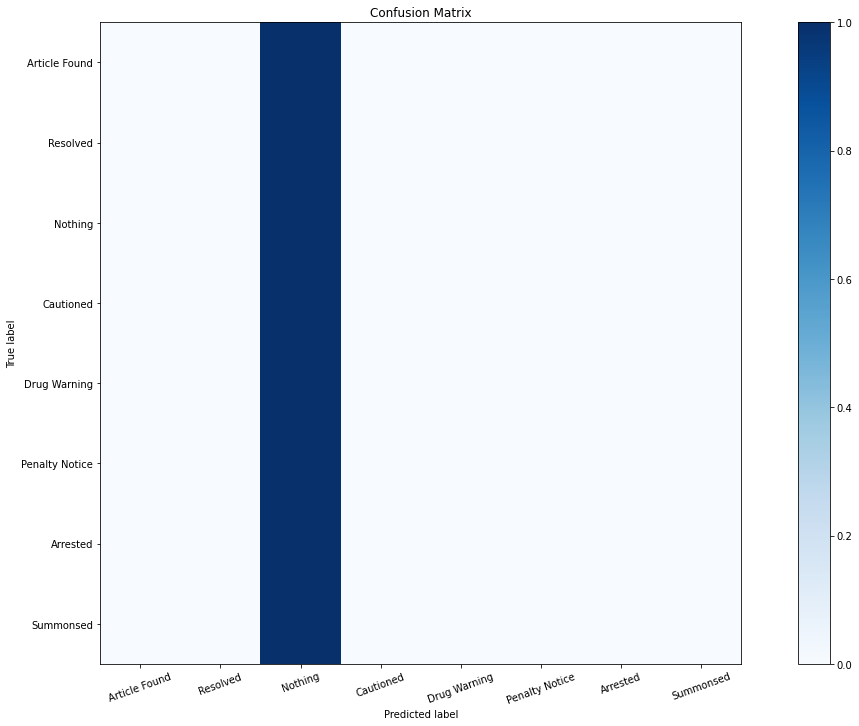

In [8]:
svm2 = SVC(kernel = 'linear')
svm2.fit(X_train, y_train)

print(f"Training Score: {svm2.score(X_train, y_train)}")
print(f"Testing Score: {svm2.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = svm2.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

If the data is linearly inseperatable, then it is better to use a RBF kernel.

In [9]:
# svm3 = SVC(kernel = 'poly')
# svm3.fit(X_train, y_train)

# print(f"Training Score: {svm3.score(X_train, y_train)}")
# print(f"Testing Score: {svm3.score(X_test, y_test)}")
# print("\n Confusion Matrix")
# y_predictions = svm3.predict(X_test)
# util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

Training Score: 0.6550935707817688
Testing Score: 0.6509613353053032

 Confusion Matrix


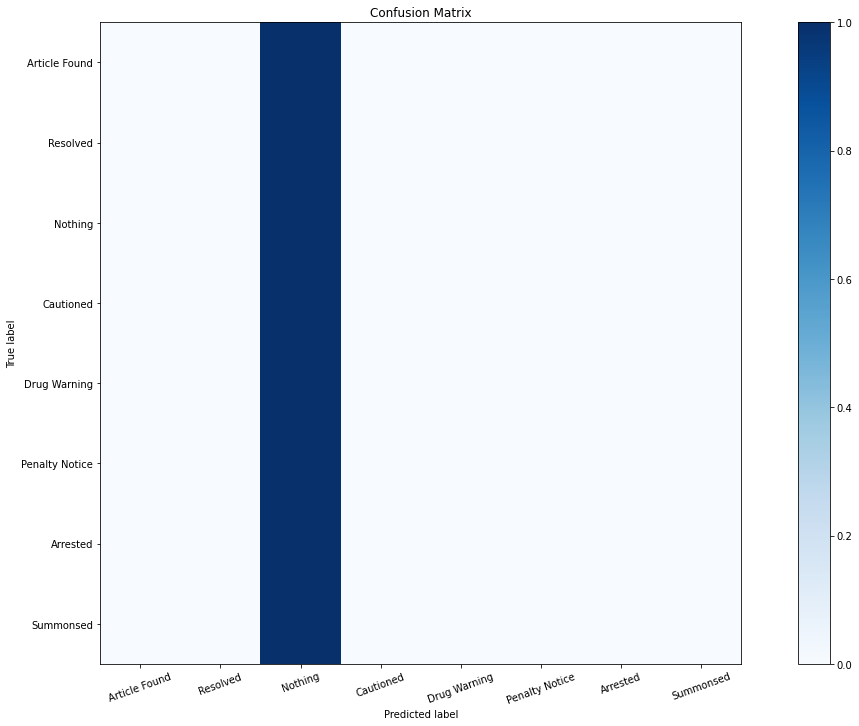

In [10]:
svm4 = SVC(kernel = 'rbf')
svm4.fit(X_train, y_train)

print(f"Training Score: {svm4.score(X_train, y_train)}")
print(f"Testing Score: {svm4.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = svm4.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

This only yielded a marginally better training score.

## Split target into "Police Action" (1) and "No Action" (0)

I will try to repeat the above process, but instead of the target being split into eight classes, I split it into two: either there was police action after the stop and search, or there wasn't.

In [11]:
#Replace all values in Outcome column, with 0 if "Nothing found - no further action", else 1.
# Reference for dictionary idea to replace values: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
outcome_splitter = {
    "Nothing found - no further action": 0, 
    "Article found - Detailed outcome unavailable": 1, 
    "Local resolution": 1,
    "Offender cautioned": 1,
    "Offender given drugs possession warning": 1,
    "Offender given penalty notice": 1,
    "Suspect arrested": 1,
    "Suspect summonsed to court": 1
    }
data_binary = data.applymap(lambda s: outcome_splitter.get(s) if s in outcome_splitter else s)
data_binary.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
1,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
2,Person search,2015-03-02 18:45:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
4,Person and Vehicle search,2015-03-03 15:50:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
5,Person search,2015-03-03 20:20:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0


In [12]:
data_binary_encoded, encoders_binary = util.data_encoder(data_binary)

print(encoders_binary)
data_binary_encoded.head()

{'Type Encoder': LabelEncoder(), 'Date Encoder': LabelEncoder(), 'Gender Encoder': LabelEncoder(), 'Age range Encoder': LabelEncoder(), 'Officer-defined ethnicity Encoder': LabelEncoder(), 'Legislation Encoder': LabelEncoder(), 'Object of search Encoder': LabelEncoder(), 'Outcome Encoder': LabelEncoder()}


,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,1
1,1,0,51.512286,-0.114491,1,1,0,4,8,1
2,1,1,51.512286,-0.114491,1,1,4,4,8,1
4,0,2,51.512286,-0.114491,1,1,4,4,8,1
5,1,3,51.512286,-0.114491,1,1,0,3,3,0


In [13]:
# Split into features and target
target_binary = data_binary_encoded["Outcome"]
features_binary = data_binary_encoded.drop('Outcome', axis=1)

# Split into train and test
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(features_binary, target_binary, test_size=0.2, random_state=10)

#Process to normalise the data to [-1,1]
#Processing technique from: https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution
X_train_binary = preprocessing.scale(X_train_binary)
X_test_binary = preprocessing.scale(X_test_binary)

Train (Binary) score: 0.6548747358889224
Test (Binary) score: 0.651021701729498

 Confusion matrix


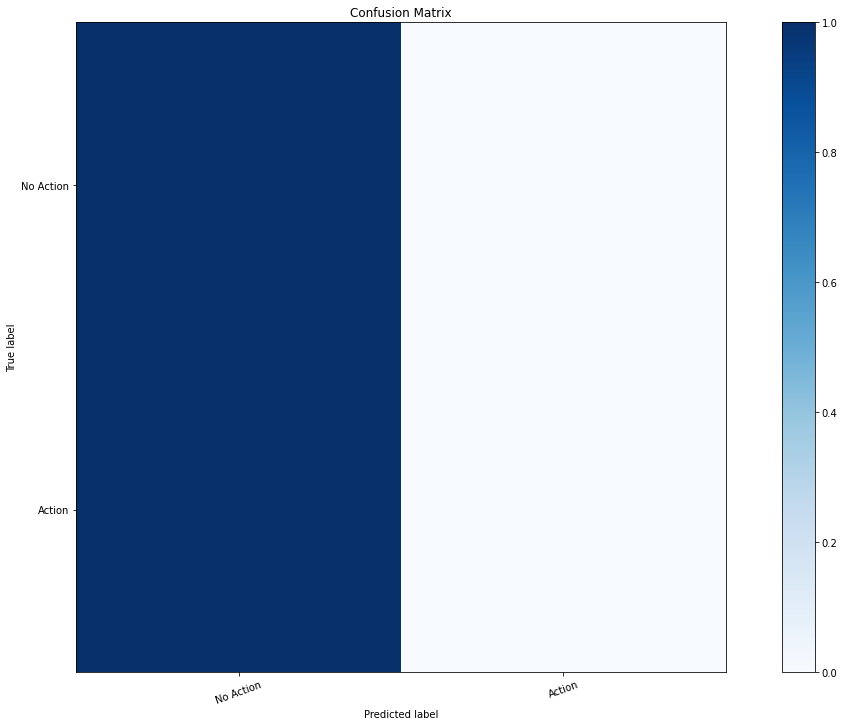

In [14]:
svm_binary = SVC(kernel = 'linear')
svm_binary.fit(X_train_binary, y_train_binary) 
print(f"Train (Binary) score: {svm_binary.score(X_train_binary, y_train_binary)}")
print(f"Test (Binary) score: {svm_binary.score(X_test_binary, y_test_binary)}")
print(f"\n Confusion matrix")

y_predictions_binary = svm_binary.predict(X_test_binary)
util.confusion_plot(y_test=y_test_binary, y_predictions=y_predictions_binary, target_classes=["No Action", "Action"])


It appears the SVM is only predicting No Action as its outcome, perhaps splitting by K cross validation will be better for splitting the data.

## Training Using K-Fold Cross Validation

In [18]:

#Split the data, into a small testing set (test size 0.1), and large training set (that will be passed into K-cross validation)
X_train_binary_k, X_test_binary_k, y_train_binary_k, y_test_binary_k = train_test_split(features_binary, target_binary, test_size=0.1, random_state=10)

#Merging X_train and y_train into a single dataframe for K-cross validation utility function
#Merging technique from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [X_train_binary_k, y_train_binary_k]
k_fold_binary_data = pd.concat(frames, axis=1)

#K-cross validation on k_fold_binary_data 
svm_binary_kfold = SVC(kernel = 'linear')
util.k_fold_train(model=svm_binary_kfold, data=k_fold_binary_data)

🚫 WARNING 🚫: this function will take time to process.
 
